
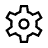
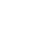
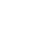


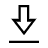
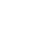
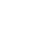


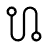
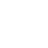
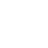


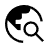
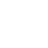
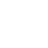


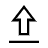
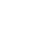
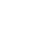


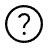
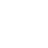
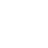


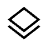
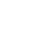
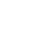


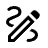
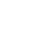
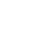


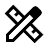
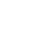
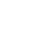


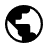
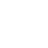
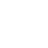

Calculating radius for points: (43.351027698884366, 11.25639492821709), (43.44391576637252, 11.299663205517765), (43.5367870134505, 11.342948241171065)
Calculated radius: 13411756.690803729
Calculating radius for points: (43.44391576637252, 11.299663205517765), (43.5367870134505, 11.342948241171065), (43.62962461970816, 11.386266793529616)
Calculated radius: 16949718.077258952
Calculating radius for points: (43.5367870134505, 11.342948241171065), (43.62962461970816, 11.386266793529616), (43.72241176473532, 11.429635620946042)
Calculated radius: 23001777.642550275
Calculating radius for points: (43.62962461970816, 11.386266793529616), (43.72241176473532, 11.429635620946042), (43.815131628121804, 11.473071481772969)
Calculated radius: 35746300.84502074
Calculating radius for points: (43.72241176473532, 11.429635620946042), (43.815131628121804, 11.473071481772969), (43.90776738945746, 11.516591134363024)
Calculated radius: 80122551.65504982
Calculating radius for points: (43.8151316281218

NameError: name 'route_name_label' is not defined

In [1]:
from ipyleaflet import Map, Marker, Icon, Polyline, WidgetControl, CircleMarker, Popup, LayerGroup, DivIcon, Rectangle, GeoData, DrawControl, basemaps
from ipywidgets import Button, FileUpload, Layout, widgets, VBox, HBox, Text, Dropdown, HTML, Layout, Label
import ipywidgets as widgets
from IPython.display import display, HTML, Javascript, FileLink
from pathlib import Path
import base64
from geographiclib.geodesic import Geodesic
import os
import numpy as np
import zipfile
import io
from scipy.interpolate import make_interp_spline, CubicSpline
from scipy.special import comb
import osmnx as ox
import geopandas as gpd
import json
from geopy.distance import geodesic
from shapely.geometry import Point, LineString
from scipy.spatial import distance
import tempfile
import time  # Import the time module at the beginning of your script
from math import sqrt
from geopy.distance import great_circle




def on_layer_click(feature, **kwargs):
    global layer_properties_info
    properties = feature['properties']

    # Determine the layer type
    if 'highway' in properties:
        layer_type = "Road"
    elif 'railway' in properties:
        layer_type = "Railway"
    elif 'building' in properties:
        layer_type = "Building"
    elif 'landuse' in properties:
        layer_type = "Zoning"
    elif 'amenity' in properties:
        layer_type = "POI"
    elif 'boundary' in properties:
        layer_type = "Admin Boundary"
    elif 'waterway' in properties:
        layer_type = "Waterway"
    elif 'leisure' in properties and properties['leisure'] == 'park':
        layer_type = "Park/Green Space"
    elif 'natural' in properties:
        layer_type = "Natural Feature"
    else:
        layer_type = "Unknown"

    # Format the information based on layer type
    info = f"<b>Category:</b> {layer_type}<br>"
    if layer_type in ["Road", "Railway", "Waterway"]:
        info += f"<b>Name:</b> {properties.get('name', 'None')}<br>"
        info += f"<b>Length:</b> {properties.get('length', 'None')}<br>"
        info += f"<b>Bridge:</b> {properties.get('bridge', 'None')}<br>"
        info += f"<b>Junction:</b> {properties.get('junction', 'None')}<br>"
        info += f"<b>Width:</b> {properties.get('width', 'None')}<br>"
    elif layer_type == "Building":
        info += f"<b>Name:</b> {properties.get('name', 'None')}<br>"
        info += f"<b>City:</b> {properties.get('city', 'None')}<br>"
        info += f"<b>Street:</b> {properties.get('street', 'None')}<br>"
        info += f"<b>Number:</b> {properties.get('number', 'None')}<br>"
        info += f"<b>Postcode:</b> {properties.get('postcode', 'None')}<br>"
        info += f"<b>Operator:</b> {properties.get('operator', 'None')}<br>"
        info += f"<b>Phone:</b> {properties.get('phone', 'None')}<br>"
        info += f"<b>Website:</b> {properties.get('website', 'None')}<br>"
    elif layer_type == "Zoning":
        info += f"<b>Land use:</b> {properties.get('landuse', 'None')}<br>"
    elif layer_type == "POI":
        info += f"<b>Name:</b> {properties.get('name', 'None')}<br>"
        info += f"<b>Amenity:</b> {properties.get('amenity', 'None')}<br>"
        info += f"<b>Operator:</b> {properties.get('operator', 'None')}<br>"
    elif layer_type == "Admin Boundary":
        info += f"<b>Name:</b> {properties.get('name', 'None')}<br>"
        info += f"<b>Population:</b> {properties.get('population', 'None')}<br>"
        info += f"<b>Boundary:</b> {properties.get('boundary', 'None')}<br>"
    elif layer_type == "Park/Green Space":
        info += f"<b>Name:</b> {properties.get('name', 'None')}<br>"
        info += f"<b>Type:</b> {properties.get('leisure', 'None')}<br>"
    elif layer_type == "Natural Feature":
        info += f"<b>Name:</b> {properties.get('name', 'None')}<br>"
        info += f"<b>Natural:</b> {properties.get('natural', 'None')}<br>"

    # Store information for displaying in the right content area
    layer_properties_info = info

    # Update the Properties tab content
    update_properties_content()


    
layer_properties_info = ""

layers_list_css = """
<style>
    .layers-list .widget-label {
        font-weight: bold;
    }
</style>
"""
display(HTML(layers_list_css))

custom_css = """
<style>
    .widget-dropdown select {
        font-size: 0.9em !important;
    }
</style>
"""

css_line_spacing = """
<style>
    .jupyter-widgets .widget-label, 
    .jupyter-widgets .widget-readout,
    .jupyter-widgets .widget-html-content {
        line-height: 1.3;   /* Adjust this value as per your preference. Default is typically 1.5. */
        font-size: 1em;
    }
</style>
<style>
    .right-content-area {
        /* other styles... */
        
    }
</style>
"""
display(HTML(css_line_spacing))

# CSS styles for button appearance
css_button_styles = """
<style>
    .custom-button {
        border-radius: 4px; /* Rounded corners */
        background-color: rgba(31, 75, 97, 0.5)
        border: none !important;
        color: black !important;
        font-weight: 500 !important;
        font-size: 0.9em;
        font-family: Segoe UI;
        transition: background-color 0.3s ease; /* Smooth transition for background color change */
    }
    
    .custom-button:hover {
        background-color: #1f4b61 !important; /* Solid #1f4b61 color on hover */
        border-radius: 4px; /* Rounded corners */
        border: none !important;
        color: white !important;
        font-weight: 500 !important;
        font-size: 0.9em;
        font-family: Segoe UI;
        transition: background-color 0.3s ease; /* Smooth transition for background color change */
    }
    
    .custom-button:active,
    .custom-button-active {
        background-color: rgba(31, 75, 97, 0.75) !important;
        border-radius: 4px; /* Rounded corners */
        border: none !important;
        color: white !important;
        font-weight: 500 !important;
        font-size: 0.9em;
        font-family: Segoe UI;
        transition: background-color 0.3s ease; /* Smooth transition for background color change */
    }
</style>
"""
display(HTML(css_button_styles))

# CSS for square buttons with larger icons
square_button_css = """
<style>
    .square-button {
        width: 60px !important;
        height: 60px !important;
        padding: 0 !important;
        justify-content: center !important;
        margin: 2px !important;
        border: none;
        border-radius: 4px; /* Rounded corners */
        background-color: #eeeeee !important;
        color: black !important;
        font-weight: 500 !important;
        font-size: 0.9em;
        font-family: Segoe UI;
        transition: background-color 0.3s ease; /* Smooth transition for background color change */
    }
    .square-button:hover {
        background-color: #1f4b61 !important; /* Solid #1f4b61 color on hover */
        color: white !important;
    }
    .square-button i {
        color: #1e1e1e;
        font-size: 22px;  /* Increase the font size for larger icons */
    }
    .square-button:hover i {
        color: white !important; /* Change icon color to white on hover */
    }
</style>
"""
display(HTML(square_button_css))

# Define CSS styles for the layers list
layers_list_style = """
<style>
    .layers-list-item {
        padding-left: 15px;
        font-size: larger;
        font-weight: bold;
        list-style-type: disc; /* for bullets */
        margin-left: 10px; /* to align bullets outside the padding area */
        margin-top: 10px; /* Spacing between items */
        margin-bottom: 10px; /* Spacing between items */
    }
</style>
"""
display(HTML(layers_list_style))

custom_text_input = """
<style>
.custom-text-input .widget-text input {
    font-size: 0.9em; /* Smaller font size */
}
</style>
"""

# Display the CSS style
display(HTML(custom_css))

def load_logo(logo_path):
    with open(logo_path, "rb") as f:
        image = f.read()
    return widgets.Image(value=image, format='png', layout=widgets.Layout(width='23%'))

logo_path = "./LOGO.png"
logo_widget = load_logo(logo_path)
logo_widget.layout.width = '80%'
logo_widget.layout.margin = '0 auto 30px auto'
logo_widget.layout.display = 'block'


last_button_id = None

# Add the global variable here
hub_creation_mode = False
point_creation_mode = False  # Add this line
line_creation_mode = False
selected_points = []
all_points = []
line_coordinates = []
current_mode=[]
# Create lists to keep track of hubs, points, and lines
hubs = []
points = []
lines = []
points = []
branch_points = []
branch_hubs = []
curve = None
current_mode = None
label_markers = {}  # Store label markers associated with points
marker_types = {}
branch_curve = []
distance_labels = []
curve = []
hub_names = {}
labels_visible = True
route_info_control = None
saved_routes = []
# OSM Map
m = Map(center=(50, 20), zoom=4, scroll_wheel_zoom=True, layout=widgets.Layout(width='74%', height='99%'))


# Initialize a global variable for boundary
boundary = None
# Global dictionary to keep track of added layers
added_layers = {}

# Create a LayerGroup to hold the boundary rectangle
boundary_layer_group = LayerGroup()
m.add_layer(boundary_layer_group)

# Create a DrawControl for drawing the boundary
draw_control = DrawControl(
    rectangle={"shapeOptions": {"color": "#10a393", "weight": "3", "fillColor": "#10a393", "opacity": "100%", "fillOpacity": "25%"}, "allowIntersection": False},
)
draw_control.polygon = {}
draw_control.polyline = {}
draw_control.circlemarker = {}


def measure_drawn_shape(shape, map_units):
    if isinstance(shape, dict) and 'type' in shape:
        coordinates = shape['coordinates']
        if shape['type'] == "LineString":  # Measure distance
            distance = 0
            for i in range(len(coordinates) - 1):
                distance += Geodesic.WGS84.Inverse(coordinates[i][1], coordinates[i][0], coordinates[i+1][1], coordinates[i+1][0])["s12"]
            distance /= 1000  # Convert to km
            return f"Distance: {distance:.2f} km"
        elif shape['type'] == "Polygon":  # Measure area
            area = Geodesic.WGS84.Area(coordinates[0])["s12"]
            area /= (1000 * 1000)  # Convert to square km instead of ha
            return f"Area: {abs(area):.2f} km²"
    return ""

# Function that will be called when a rectangle is drawn
def handle_draw(target, action, geo_json):
    global boundary
    # If the action is 'deleted', clear the layers and reset the boundary variable
    if action == 'deleted':
        boundary_layer_group.clear_layers()
        boundary = None
    # If the action is 'created', proceed with creating the rectangle
    elif action == 'created':
        # Clear any existing boundary rectangle from the layer group
        boundary_layer_group.clear_layers()
        
        # Get the bounds of the drawn rectangle
        coords = geo_json['geometry']['coordinates'][0]
        bounds = {
            'north': max(coords[0][1], coords[2][1]),
            'south': min(coords[0][1], coords[2][1]),
            'east': max(coords[1][0], coords[3][0]),
            'west': min(coords[1][0], coords[3][0]),
        }
        boundary = bounds  # Update the global boundary variable with the new bounds
        
        # Add a rectangle to the map to visualize the boundary
        rect = Rectangle(bounds=((bounds['south'], bounds['west']), (bounds['north'], bounds['east'])), color="#10a393", weight=3, fillColor="#10a393", fillOpacity=0.25)
        boundary_layer_group.add_layer(rect)

# Register the drawing handler
draw_control.on_draw(handle_draw)

def on_define_boundary_click(b):
    global draw_control
    # Check if draw control is already on the map to determine action
    if draw_control not in m.controls:
        # If draw control is not on the map, add it and change button description to "Finish"
        m.add_control(draw_control)
        b.description = "Finish"
        b.add_class('custom-button-active')  # Add the active class
    else:
        # If draw control is on the map, remove it, revert button description, and remove the active class
        m.remove_control(draw_control)
        b.description = "Define boundary"
        b.remove_class('custom-button-active')  # Remove the active class

# MAP SETTINGS

map_units_dropdown = widgets.Dropdown(
    options=['meters', 'kilometers'],
    value='meters',
    description='Map units:'
)

def on_map_unit_change(change):
    # You can set any logic needed to adjust the map units here
    print(f"Map unit changed to {change['new']}")

map_units_dropdown.observe(on_map_unit_change, names='value')





# PROJECT TOOLS
# Add the components for the "Project Tools"
open_project_btn = widgets.Button(description="Open Project", layout=widgets.Layout(width='150px'))
open_project_btn.add_class('custom-button')
define_boundary_btn = widgets.Button(description="Define boundary", layout=widgets.Layout(width='150px'))
define_boundary_btn.add_class('custom-button')
project_name_input = widgets.Text(placeholder='Input your Project Name...', layout=widgets.Layout(width='250px'))
save_project_btn = widgets.Button(description="Save Project", layout=widgets.Layout(width='150px'))
save_project_btn.add_class('custom-button')
route_name_input = widgets.Text(placeholder='Route Name', layout=widgets.Layout(width='150px'))
project_status_label = widgets.Label(value="You are not working on any project.")
new_project_message_label = widgets.Label(value="Or, if you want to create a new Project, specify its name and save it.")

# Define the "Save changes" button
save_changes_btn = widgets.Button(description="Save changes", layout=widgets.Layout(width='150px'))
save_changes_btn.layout.display = 'none'  # Initially hidden
save_changes_btn.add_class('custom-button')

# Create a variable to store the project name when the project is created
created_project_name = ""

def on_save_project_click(button):
    global created_project_name
    created_project_name = project_name_input.value
    # Update the project status label to show the current project name
    project_status_label.value = f"Current Project: {project_name_input.value}"
    
    # Hide the project_name_input, save_project_btn, and new_project_message_label
    project_name_input.layout.display = 'none'
    save_project_btn.layout.display = 'none'
    new_project_message_label.layout.display = 'none'
    
    # Display the "Save changes" button
    save_changes_btn.layout.display = 'block'

# Attach the callback to the save_project_btn click event (if not already attached)
save_project_btn.on_click(on_save_project_click)

# Adjusting font size for new_project_message_label
new_project_message_label.style.font_size = '13px'  # You can modify '12px' to your desired size

# Adjusting font size for project_status_label
project_status_label.style.font_size = '13px'  # You can modify '12px' to your desired size

# Modify the zip_project_folder_to_specific_location function
def modified_zip_project_folder_to_specific_location(button):
    # Ensure a project has been created before attempting to zip
    if not created_project_name:
        print("Error: No project has been created.")
        return

    # Determine the username and construct the target directory path
    username = os.getlogin()
    target_directory = f"C:/Users/{username}/Hardt/Projects and Workstreams - 2023.02 Compass tool development/COMPASS/Projects"
    project_folder_path = os.path.join(target_directory, created_project_name)
    
    zip_file_path = os.path.join(target_directory, f"{created_project_name}.zip")
    
    # Create a .zip file containing all files in the project folder
    try:
        with zipfile.ZipFile(zip_file_path, 'w') as zipf:
            for root, dirs, files in os.walk(project_folder_path):
                for file in files:
                    zipf.write(os.path.join(root, file), os.path.relpath(os.path.join(root, file), project_folder_path))
        
        # Update the displayed message
        message_display.value = f'Project <b>{created_project_name}</b> has been saved and updated.'
    except Exception as e:
        with navigation_output:
            print(f"Error zipping the project: {str(e)}")

# Return the modified functions for verification
on_save_project_click, modified_zip_project_folder_to_specific_location

save_changes_btn.on_click(modified_zip_project_folder_to_specific_location)

def display_file_upload_widget(button):
    display(open_project_upload)

# Attach the function to the "Open Project" button
open_project_btn.on_click(display_file_upload_widget)

# 1. Create a FileUpload widget
open_project_upload = FileUpload(
    accept='.zip',  # Accept only .zip files
    multiple=False  # Allow only single file upload
)

# 2. Define the function that handles the uploaded file
def open_project(change):
    # Ensure the uploaded file is a .zip file
    if open_project_upload.metadata[0]['name'].endswith('.zip'):
        uploaded_filename = open_project_upload.metadata[0]['name']
        content = open_project_upload.data[0]
        
        # Determine where to extract the uploaded project
        username = os.getlogin()
        target_directory = f"C:/Users/{username}/Hardt/Projects and Workstreams - 2023.02 Compass tool development/COMPASS/Projects"
        
        # Path to save the uploaded .zip file
        zip_path = os.path.join(target_directory, uploaded_filename)
        
        # Write the uploaded content to this path
        with open(zip_path, 'wb') as f:
            f.write(content)
            
        # Extract the .zip file
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(target_directory)
        
        # Optional: Delete the .zip file after extraction
        os.remove(zip_path)
        
        # Update message to notify user of the current project
        project_name = uploaded_filename[:-4]  # Remove the .zip extension
        message_display.value = f"Current Project: <b>{project_name}</b>"

# 3. Attach the function to the FileUpload widget's observe method
open_project_upload.observe(open_project, names='data')


# IMPORT TOOLS
# Add the components for the "Project Tools"
import_roads_btn = widgets.Button(description="Import Roads", layout=widgets.Layout(width='150px'), tooltip="Import Roads")
import_roads_btn.add_class('custom-button')
import_railways_btn = widgets.Button(description="Import Railways", layout=widgets.Layout(width='150px'), tooltip="Import Railways")
import_railways_btn.add_class('custom-button')
import_buildings_btn = widgets.Button(description="Import Buildings", layout=widgets.Layout(width='150px'), tooltip="Import Buildings")
import_buildings_btn.add_class('custom-button')
import_zoning_btn = widgets.Button(description="Import Zoning", layout=widgets.Layout(width='150px'), tooltip="Import Zoning")
import_zoning_btn.add_class('custom-button')
import_SHP_btn = widgets.Button(description="Import SHP", layout=widgets.Layout(width='150px'))
import_SHP_btn.add_class('custom-button')
define_boundary_btn = Button(description="Define Boundary", layout=Layout(width='150px'), tooltip="Define Boundary")
define_boundary_btn.add_class('custom-button')
import_waterways_btn = widgets.Button(description="Import Waterways", layout=widgets.Layout(width='150px'), tooltip="Import Waterways")
import_waterways_btn.add_class('custom-button')
import_parks_btn = widgets.Button(description="Import Green Spaces/Parks", layout=widgets.Layout(width='200px'), tooltip="Import Green Spaces/Parks")
import_parks_btn.add_class('custom-button')
import_land_use_btn = widgets.Button(description="Import Land Use", layout=widgets.Layout(width='150px'), tooltip="Import Land Use")
import_land_use_btn.add_class('custom-button')
import_pois_btn = widgets.Button(description="Import Points of Interest", layout=widgets.Layout(width='200px'), tooltip="Import POIs")
import_pois_btn.add_class('custom-button')
import_public_transport_btn = widgets.Button(description="Import Public Transport", layout=widgets.Layout(width='200px'), tooltip="Import Public Transport")
import_public_transport_btn.add_class('custom-button')
import_admin_boundaries_btn = widgets.Button(description="Import Administrative Boundaries", layout=widgets.Layout(width='250px'), tooltip="Import Administrative Boundaries")
import_admin_boundaries_btn.add_class('custom-button')
import_natural_features_btn = widgets.Button(description="Import Natural Features", layout=widgets.Layout(width='200px'), tooltip="Import Natural Features")
import_natural_features_btn.add_class('custom-button')

# EXPORT
# Add the components for the "Project Tools"
export_pdf_btn = widgets.Button(description="Export PDF", layout=widgets.Layout(width='150px'))
export_pdf_btn.add_class('custom-button')
export_vessel_btn = widgets.Button(description="Export to VESSEL", tooltip="This will export a current project as a VESSEL readable SHP file.",layout=widgets.Layout(width='150px'))
export_vessel_btn.add_class('custom-button')

hub_choices = {
    'Passenger': basemaps.OpenStreetMap.Mapnik,
    'Cargo': basemaps.Esri.WorldImagery
}



# ROuting
# Add the components for the "Project Tools"
minimum_speed_text = widgets.Text(placeholder='Minimum speed (km/h)', layout=widgets.Layout(width='200px'))
minimum_speed_text.add_class('custom-text-input')
route_name_text = widgets.Text(placeholder="Enter route name here", layout=widgets.Layout(width='200px'))
route_name_text.add_class('custom-text-input')
create_route_btn = widgets.Button(description="Create Route", layout=widgets.Layout(width='150px'), tooltip="Create Route")
create_route_btn.add_class('custom-button')
create_hubs_btn = widgets.Button(description="Create Hubs", layout=widgets.Layout(width='150px'), tooltip="Create Hubs")
create_hubs_btn.add_class('custom-button')
create_points_btn = widgets.Button(description="Create Points", layout=widgets.Layout(width='150px'), tooltip="Create Points")
create_points_btn.add_class('custom-button')
create_curves_btn = widgets.Button(description="Create Route", layout=widgets.Layout(width='150px'), tooltip="Create Route")
create_curves_btn.add_class('custom-button')
create_branch_btn = widgets.Button(description="Create Branch", layout=widgets.Layout(width='150px'), tooltip="Create Branch")
create_branch_btn.add_class('custom-button')
create_switches_btn = widgets.Button(description="Create Switches", layout=widgets.Layout(width='150px'), tooltip="Create Switches")
create_switches_btn.add_class('custom-button')
create_branch_hubs_btn = widgets.Button(description="Create Branch Hubs", layout=widgets.Layout(width='150px'), tooltip="Create Branch Hubs")
create_branch_hubs_btn.add_class('custom-button')
create_branch_points_btn = widgets.Button(description="Create Branch Points", layout=widgets.Layout(width='150px'), tooltip="Create Branch Points")
create_branch_points_btn.add_class('custom-button')
clear_map_btn = widgets.Button(description="", icon="trash", tooltip="Delete Route", layout=Layout(width='40px', height='28px', visibility='hidden'))
clear_map_btn.add_class('custom-button')
toggle_labels_btn = widgets.Button(description="", icon="eye", tooltip="Toggle label visibility", layout=Layout(width='40px', height='28px', visibility='hidden'))
toggle_labels_btn.add_class('custom-button')
hub_instructions = widgets.HTML("<i>1. Specify a Hub Name and select a Hub Type from the menu below.<br />2. Select a location and click on the map to place the hub.<br />3. For the next hubs, change the Hub Name and optionally the Hub Type and click on the map again.<br />3. When you're ready, click on <u>Finish</u> button or select another function below.</i><br /><br />")
hub_instructions.layout.display = 'none'  # Initially hide the instructions
point_instructions = widgets.HTML("<i>1. Select a locations on the map to place Points.<br />2. These points will be used to define the shape of your route.<br />3. When you're ready, click on <u>Finish</u> button or select another function below.</i>")
point_instructions.layout.display = 'none'  # Initially hide the instructions
line_instructions = widgets.HTML("<i>1. Select a first Point or Hub by clicking the marker on the map. This will be a starting point for your line.<br />2. Select a next point and the line will be created.<br />3. Select consecutive points and more lines will be created.<br /> 4. If you want to start with a different branch, please click on <u>Finish</u> button and start over.<br />5. When you're ready, click on <u>Finish</u> button or select another function below.</i>")
line_instructions.layout.display = 'none'  # Initially hide the instructions
curve_instructions = widgets.HTML("<i>1. Select a first Point or Hub by clicking the marker on the map. This will be a starting point for your curve.<br />2. Select 2 next points and the curve will be created. There is also a guidance line created.<br />3. Select consecutive points and more curves will be created. <br/>4. If you want to start with a different branch, please click on <u>Finish</u> button and start over.<br />5. When you're ready, click on <u> Finish</u> button or select another function. </i>")
curve_instructions.layout.display = 'none'  # Initially hide the instructions
hub_instructions.layout.display = 'none'  # Initially hide the instructions
hub_name_text = widgets.Text(placeholder='Enter Hub Name...', layout=widgets.Layout(width='250px'))
hub_type_dropdown = Dropdown(options=['Passenger', 'Cargo'], layout=widgets.Layout(width='250px'))
hub_type_dropdown.add_class('widget-dropdown')
hub_name_text.layout.display = 'none'  # Initially hide the instructions
hub_type_dropdown.layout.display = 'none'  # Initially hide the instructions
delete_route_btn = widgets.Button(description="Delete Route", layout=widgets.Layout(width='150px'))
delete_route_btn.add_class('custom-button')

create_hubs_btn.layout.visibility = 'hidden'
create_points_btn.layout.visibility = 'hidden'
create_switches_btn.layout.visibility = 'hidden'
create_branch_btn.layout.visibility = 'hidden'
create_curves_btn.layout.visibility = 'hidden'
create_branch_points_btn.layout.visibility = 'hidden'
create_branch_hubs_btn.layout.visibility = 'hidden'
hub_name_text.layout.display = 'none'
hub_type_dropdown.layout.display = 'none'

def validate_route_creation(change=None):
    # Enable Create Route button only if both fields are filled
    # Note: The change parameter is optional and defaults to None
    # This allows calling the function without an event
    create_route_btn.disabled = not (route_name_text.value.strip() and minimum_speed_text.value.strip())

# Set up observers for the text fields to validate route creation criteria
route_name_text.observe(validate_route_creation, 'value')
minimum_speed_text.observe(validate_route_creation, 'value')

# Initial validation check to set the correct initial state of the Create Route button
validate_route_creation()
    
def create_route(btn):
    if create_route_btn.description == "Create Route":
        # Make UI changes for route creation
        create_hubs_btn.layout.visibility = 'visible'
        create_points_btn.layout.visibility = 'visible'
        create_switches_btn.layout.visibility = 'visible'
        create_branch_btn.layout.visibility = 'visible'
        create_curves_btn.layout.visibility = 'visible'
        clear_map_btn.layout.visibility = 'visible'
        toggle_labels_btn.layout.visibility = 'visible'
        
        route_name_text.disabled = True
        minimum_speed_text.disabled = True  # Disable Minimum Speed text field
        create_route_btn.description = "Save Route"
        points = []
        curve = None
    else:
        # Handle saving the route and preparing for a new route
        reset_ui_for_new_route()
        
def save_current_route():
    global saved_routes, points, curve, label_markers, current_route_info, hub_names
    # Save the current route's data
    current_route_data = {
        "points": points.copy(),
        "curve": curve.copy(),
        "label_markers": label_markers.copy(),
        "hub_names": hub_names.copy(),
        # Add other relevant data here
    }
    saved_routes.append(current_route_data)        

    
def reset_ui_for_new_route():
    global points, curve, label_markers, hub_names
    # Save the current route before resetting
    save_current_route()
    
    # Clear route-specific data to ensure new route starts fresh
    points = []  # Reset points list for the new route
    curve = None  # Reset curve data for the new route
    label_markers = []  # Assuming you want to reset label markers as well
    hub_names = []  # Assuming you want to reset hub names as well
    hubs = []
    branch_points = []
    branch_hubs = []
    switches = []
    
    # Re-enable and show the hub creation UI components
    hub_name_text.layout.display = ''  # Make hub name text input visible
    hub_type_dropdown.layout.display = ''  # Make hub type dropdown visible
    hub_name_text.value = ''  # Clear the hub name text field
    hub_type_dropdown.value = 'Passenger'  # Reset the dropdown to a default value
    
    # Resetting the UI components for a new route creation
    create_hubs_btn.layout.visibility = 'hidden'
    create_points_btn.layout.visibility = 'hidden'
    create_switches_btn.layout.visibility = 'hidden'
    create_branch_points_btn.layout.visibility = 'hidden'
    create_branch_hubs_btn.layout.visibility = 'hidden'
    create_branch_btn.layout.visibility = 'hidden'
    create_curves_btn.layout.visibility = 'hidden'
    hub_name_text.layout.visibility = 'hidden'
    hub_type_dropdown.layout.visibility = 'hidden'
    clear_map_btn.layout.visibility = 'hidden'
    toggle_labels_btn.layout.visibility = 'hidden'
    route_name_text.disabled = False
    route_name_text.value = ""
    minimum_speed_text.disabled = False
    minimum_speed_text.value = ""
    create_route_btn.description = "Create Route"
    

def enter_create_hubs_mode(b):
    global current_mode  # Use the global variable
    if current_mode != 'hubs':
        current_mode = 'hubs'
        create_hubs_btn.description = "Finish"
        create_hubs_btn.add_class('custom-button-active')
        # Disable other buttons
        create_points_btn.disabled = True
        create_switches_btn.disabled = True
        create_branch_points_btn.disabled = True
        create_branch_hubs_btn.disabled = True
        create_branch_btn.disabled = True
        # Show the widgets by setting display to ''
        hub_name_text.layout.display = ''
        hub_type_dropdown.layout.display = ''
        m.default_style = {'cursor': 'crosshair'}
    else:
        # This block executes when finishing hub creation
        current_mode = None  # Reset current_mode or set to a different state
        create_hubs_btn.description = "Create Hubs"  # Reset button description
        create_hubs_btn.remove_class('custom-button-active')
        # Enable other buttons
        create_points_btn.disabled = False
        create_switches_btn.disabled = False
        create_branch_points_btn.disabled = False
        create_branch_hubs_btn.disabled = False
        create_branch_btn.disabled = False
        # Hide the widgets by setting display to 'none'
        hub_name_text.layout.display = 'none'
        hub_type_dropdown.layout.display = 'none'
        m.default_style = {'cursor': 'default'}

def enter_create_points_mode(b):
    global current_mode  # Add this line to use the global variable
    if current_mode != 'points':
        current_mode = 'points'
        create_points_btn.description = "Finish"
        create_points_btn.add_class('custom-button-active')
        m.default_style = {'cursor': 'crosshair'}
    else:
        current_mode = None  # Reset current_mode for exiting points mode
        create_points_btn.description = "Create Points"
        create_points_btn.remove_class('custom-button-active')
        m.default_style = {'cursor': 'default'}

        

def enter_create_switches_mode(b):
    global current_mode  # Add this line to use the global variable
    if current_mode != 'switches':
        current_mode = 'switches'
        create_switches_btn.description = "Finish"
        create_switches_btn.add_class('custom-button-active')
        m.default_style = {'cursor': 'crosshair'}
    else:
        current_mode = None  # Reset current_mode for exiting switches mode
        create_switches_btn.description = "Create Switches"
        create_switches_btn.remove_class('custom-button-active')
        m.default_style = {'cursor': 'default'}
            
def enter_create_branch_mode(b):
    global current_mode  # Add this line to use the global variable
    if current_mode != 'branch':
        current_mode = 'branch'
        create_branch_btn.description = "Finish"
        create_branch_btn.add_class('custom-button-active')
        # Enable visibility for branch mode specific buttons
        create_branch_points_btn.layout.visibility = 'visible'
        create_branch_hubs_btn.layout.visibility = 'visible'
        m.default_style = {'cursor': 'crosshair'}
    else:
        # This block executes when finishing branch creation
        current_mode = None  # Reset current_mode for exiting branch mode
        create_branch_btn.description = "Create Branch"
        create_branch_btn.remove_class('custom-button-active')
        # Hide the branch mode specific buttons when exiting branch mode
        create_branch_points_btn.layout.visibility = 'hidden'
        create_branch_hubs_btn.layout.visibility = 'hidden'
        m.default_style = {'cursor': 'default'}

        
# Global variable definitions
route_name_label = widgets.HTML()  # Use HTML instead of Label for route name
route_length_label = widgets.Label()  # To display the total length of the route

# Initialize the route_info_control with a VBox placeholder, initially empty
route_info_box = widgets.VBox([route_name_label, route_length_label])
route_info_box.layout.padding = "0px 10px"  # Adjust padding here


# Initially, add an empty route_info_box to the map as a control but keep it invisible
route_info_control = WidgetControl(widget=route_info_box, position='topright', visible=False)  # Start hidden
m.add_control(route_info_control)

def enter_create_curves_mode(b):
    global current_mode, route_info_control, route_info_box  # Ensure all variables are global
    current_mode = 'curves'
    redraw_curve()  # Draw or redraw the curve
    draw_branch_curve()  # Attempt to draw branch curve
    
    # Update the content with tighter spacing
    route_name_label.value = f"<h3><b>{route_name_text.value}</b></h3><hr>"
    route_length_label.value = f"Total Length: {calculate_total_route_length():.2f} km"
    
    
    route_info_control.visible = True  # Ensure this control is initially added to the map with visible=False

            
def enter_create_branch_points_mode(b):
    global current_mode  # Add this line to use the global variable
    if current_mode != 'branch_points':
        current_mode = 'branch_points'
        create_branch_points_btn.description = "Finish"
        create_branch_points_btn.add_class('custom-button-active')
        m.default_style = {'cursor': 'crosshair'}
    else:
        current_mode = 'branch'  # Set current_mode to 'branch' instead of None
        create_branch_points_btn.description = "Create Points"
        create_branch_points_btn.remove_class('custom-button-active')
        m.default_style = {'cursor': 'default'}
    
def enter_create_branch_hubs_mode(b):
    global current_mode  # Add this line to use the global variable
    if current_mode != 'branch_hubs':
        current_mode = 'branch_hubs'
        create_branch_hubs_btn.description = "Finish"
        create_branch_hubs_btn.add_class('custom-button-active')
        hub_name_text.layout.visibility = 'visible'
        hub_type_dropdown.layout.visibility = 'visible'
        hub_name_text.layout.display = ''
        hub_type_dropdown.layout.display = ''
        m.default_style = {'cursor': 'crosshair'}
    else:
        current_mode = 'branch'  # Set current_mode to 'branch' instead of None
        create_branch_hubs_btn.description = "Create Hubs"
        create_branch_hubs_btn.remove_class('custom-button-active')
        hub_name_text.layout.display = 'none'
        hub_type_dropdown.layout.display = 'none'
        m.default_style = {'cursor': 'default'}

def finish_creation():
    global current_mode  # Use the global variable
    # Check if currently finishing branch points or branch hubs creation
    if current_mode in ['branch_points', 'branch_hubs']:
        # Reset only the necessary components for branch points or branch hubs
        create_branch_points_btn.description = "Create Branch Points"
        create_branch_hubs_btn.description = "Create Branch Hubs"
        create_branch_points_btn.disabled = False
        create_branch_hubs_btn.disabled = False
        # Ensure cursor returns to default
        m.default_style = {'cursor': 'default'}
        # Do not reset current_mode to None here to maintain branch mode
    elif current_mode == 'branch':
        # This block is now specifically for finishing branch mode
        current_mode = None  # Reset current_mode for exiting branch mode
        create_branch_btn.description = "Create Branch"
        # Re-enable all buttons as necessary, but now specifically for branch mode completion
        create_hubs_btn.disabled = False
        create_points_btn.disabled = False
        create_switches_btn.disabled = False
        create_branch_points_btn.disabled = False
        create_branch_hubs_btn.disabled = False
        # Correctly hide and reset branch specific UI components
        create_branch_points_btn.layout.display = 'none'
        create_branch_hubs_btn.layout.display = 'none'
        m.default_style = {'cursor': 'default'}
    else:
        # Reset for other modes not related to branch creation
        current_mode = None



def handle_map_interaction(**kwargs):
    global current_mode  # Add this line to use the global variable
    if kwargs.get('type') == 'click':
        latlng = kwargs.get('coordinates')
        if current_mode == 'hubs':
            add_point(latlng, marker_type='hub')
        elif current_mode == 'points':
            add_point(latlng, marker_type='point')
        elif current_mode == 'switches':  # Handle switch creation
            add_point(latlng, marker_type='switch')
        elif current_mode == 'branch_points':  # Handle switch creation
            add_point(latlng, marker_type='branch_point')
        elif current_mode == 'branch_hubs':  # Handle switch creation
            add_point(latlng, marker_type='branch_hub')
            
def toggle_labels_visibility(b):
    global labels_visible
    # Toggle the visibility state
    labels_visible = not labels_visible
    
    # Update the visibility of each label
    for label in distance_labels:
        label.visible = labels_visible
    
    # Update the button icon based on the current visibility state
    if labels_visible:
        toggle_labels_btn.icon = "eye"
    else:
        toggle_labels_btn.icon = "eye-slash"  # Assuming "eye-slash" is the icon for crossed-eye, adjust if necessary


        
def clear_map(b=None):
    global points, branch_points, branch_hubs, lines, curve, hub_names, label_markers, added_layers, distance_labels, hub_layer_group, curve_creation_mode, selected_curve_points, current_curve, all_curves, current_dashed_line

    # Clear markers, curves, labels, and other map elements
    for marker_list in [points, branch_points, branch_hubs]:
        for marker in marker_list:
            m.remove_layer(marker)
    points.clear()
    branch_points.clear()
    branch_hubs.clear()

    for line in lines:
        m.remove_layer(line)
    lines.clear()

    if curve:
        m.remove_layer(curve)
        curve = None

    for curve_segment in all_curves:
        m.remove_layer(curve_segment)
    all_curves.clear()

    for label in label_markers.values():
        m.remove_layer(label)
    label_markers.clear()

    for label in distance_labels:
        m.remove_layer(label)
    distance_labels.clear()

    for layer_name, layer in added_layers.items():
        m.remove_layer(layer)
    added_layers.clear()

    hub_layer_group.clear_layers()

    # Reset curve creation mode and related variables
    curve_creation_mode = False
    selected_curve_points.clear()
    if current_curve:
        m.remove_layer(current_curve)
        current_curve = None
    if current_dashed_line:
        m.remove_layer(current_dashed_line)
        current_dashed_line = None

    # Reset the UI to initial state, as if "Create Route" has not been clicked
    reset_ui_for_new_route()

def haversine(coord1, coord2):
    # Radius of the Earth in kilometers
    R = 6371.0
    lat1, lon1 = np.radians(coord1)
    lat2, lon2 = np.radians(coord2)

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    distance = R * c
    return distance    

# Function to generate a Catmull-Rom spline
def catmull_rom_spline(points, n_points=10000):
    if len(points) < 2:
        return points

    lats, lngs = zip(*points)
    t = [0]
    for i in range(1, len(points)):
        dx = lats[i] - lats[i-1]
        dy = lngs[i] - lngs[i-1]
        dist = np.sqrt(dx**2 + dy**2)
        t.append(t[-1] + dist)

    cs_lat = CubicSpline(t, lats, bc_type='natural')
    cs_lng = CubicSpline(t, lngs, bc_type='natural')
    t_values = np.linspace(0, t[-1], n_points)
    lat_values = cs_lat(t_values)
    lng_values = cs_lng(t_values)

    return list(zip(lat_values, lng_values))


    
def add_point(latlng, marker_type='point'):
    global hub_names  # Ensure you can modify the global dictionary
    # Initialize icon_url with the default value
    icon_url = 'point.png'
         # Determine icon based on marker type
    if marker_type == 'hub' or marker_type == 'branch_hub':
        icon_url = 'cargo.png' if hub_type_dropdown.value == 'Cargo' else 'passenger.png'
        print(f"Adding {marker_type}: {latlng}, Name: {hub_name_text.value}")
        
        # For hubs and branch hubs, capture the name at creation
        hub_name = hub_name_text.value  # Capture the current name from the text input
    
    elif marker_type == 'switch':
        icon_url = 'switch.png'
    elif marker_type == 'branch_point':
        icon_url = 'point.png'
    

    
    icon = Icon(icon_url=icon_url, icon_size=[25, 25])
    marker = Marker(location=latlng, icon=icon, draggable=True)
    # Properly place the assignment after the Marker instance is created
    if marker_type == 'switch':
        marker_types[marker] = "Switch"  # Now correctly references 'marker'
    elif marker_type == 'branch_point':
        marker_types[marker] = "Branch Point"  # Now correctly references 'marker'
    elif marker_type == 'branch_hub':
        marker_types[marker] = "Branch Hub"  # Now correctly references 'marker'
    elif marker_type == 'hub':  # Also handle the hub case here for consistency
        marker_types[marker] = hub_type_dropdown.value  # Assigning hub type
        

    # Store marker with its type
    marker_types[marker] = marker_type
    if marker_type in ['hub', 'branch_hub']:
        hub_names[marker] = hub_name  # Store the hub's name
        create_label_for_hub(marker, hub_name)  # Display label with the hub's name

    if current_mode == 'branch':
        branch_points.append(marker)
    else:
        points.append(marker)
    m.add_layer(marker)
    marker.observe(marker_moved, 'location')

    
            
        

def create_label_for_hub(marker, hub_name):
    label_style = '''
        background-color: white;
        border: 1px solid white;
        text-align: center;
        line-height: 20px;
        border-radius: 1px;
        font-size: 14px;
        padding: 3px 6px;
        position: relative;
        white-space: nowrap; 
        font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
        font-weight: 600;
        box-sizing: border-box;
        '''
    icon = DivIcon(html=f'<div style="{label_style}">{hub_name}</div>', icon_size=(None, None), icon_anchor=(35, 45))        
    # Create label marker at the same location as the hub marker
    label_marker = Marker(location=marker.location, icon=icon, draggable=False)
    m.add_layer(label_marker)
    # Associate the hub marker with its label marker for tracking
    label_markers[marker] = label_marker
        
def reorder_points_nearest_neighbor():
    global points
    if len(points) <= 1:
        return

    reordered_points = [points[0]]  # Start with the first point
    available_points = set(points[1:])  # Exclude the first point

    while available_points:
        last_point = reordered_points[-1]
        nearest_point, _ = min(
            ((point, calculate_distance(last_point.location, point.location)) for point in available_points),
            key=lambda x: x[1]
        )
        available_points.remove(nearest_point)
        reordered_points.append(nearest_point)

    points = reordered_points
        


            
def calculate_distance(point1, point2):
    return great_circle(point1, point2).meters
    
def calculate_total_route_length():
    total_length_km = 0
    if len(points) > 1:
        for i in range(1, len(points)):
            point1 = points[i - 1].location
            point2 = points[i].location
            total_length_km += great_circle(point1, point2).kilometers
    return total_length_km

def calculate_total_branch_length():
    total_branch_length_km = 0
    if len(branch_points) > 1:
        # Find the nearest switch for each branch point and branch hub
        for i in range(len(branch_points)):
            point = branch_points[i].location
            nearest_switch = min(points, key=lambda p: great_circle(p.location, point).kilometers if marker_types.get(p) == 'switch' else float('inf'))
            # Add the distance from the branch point or branch hub to the nearest switch
            total_branch_length_km += great_circle(nearest_switch.location, point).kilometers
            # Add the distance to the next branch point or branch hub, if it exists
            if i < len(branch_points) - 1:
                next_point = branch_points[i + 1].location
                total_branch_length_km += great_circle(point, next_point).kilometers
    return total_branch_length_km








def marker_moved(change):
    marker_moved = change['owner']
    new_location = change['new']
    # Update label position if the marker has an associated label
    if marker_moved in label_markers:
        label_markers[marker_moved].location = new_location
    
    # Check if the moved marker is a branch point or part of the main curve
    if marker_types.get(marker_moved) in ['branch_point', 'branch_hub']:
        draw_branch_curve()  # Redraw the branch curve
        
    else:
        redraw_curve()  # Redraw the main curve
        
    
def redraw_curve():
    global curve, distance_labels
    # Ensure curve is initialized as an empty list before attempting to iterate
    if curve is None:
        curve = []
    # Call the reorder function before generating the curve
    reorder_points_nearest_neighbor()
    curve_points = [point for point in points if marker_types.get(point) not in ['branch_point', 'branch_hub']]
    # Remove existing curves, dashed lines, and distance labels
    for segment in curve:
        m.remove_layer(segment)
    curve = []  # Clear the curve list for the new segments
    
    for label in distance_labels:
        m.remove_layer(label)
    distance_labels = []  # Clear the distance_labels list

    if len(points) >= 2:
        latlngs = [(marker.location[0], marker.location[1]) for marker in curve_points]
        # Generate spline points for the entire set of markers
        spline_points = catmull_rom_spline(latlngs, n_points=100)

        previous_point = spline_points[0]
        for i in range(1, len(spline_points)):
            segment_points = [previous_point, spline_points[i]]
            # Calculate and display distances for segments defined by the spline points
            if i % 10 == 0:  # Adjust the step based on your precision needs
                calculate_display_segment_distance(segment_points)

            # Calculate radius of curvature for this segment
            if i < len(spline_points) - 1:  # Ensure there are enough points to calculate
                radius = calculate_radius_of_curvature(spline_points[i-1], spline_points[i], spline_points[i+1])
            else:
                radius = float('inf')  # Assign a large value to radius for the last point

            # Display the radius information at intervals
            if i % 10 == 0:  # Adjust the step based on your precision needs
                display_radius_label(spline_points[i], radius)

            # Determine color based on radius and speed
            try:
                min_speed_km_h = float(minimum_speed_text.value)
            except ValueError:
                min_speed_km_h = 0
            max_speed_m_s = sqrt(4414.759 * (radius / 1000))
            max_speed_km_h = min(max_speed_m_s * 3.6, 700)
            color = "orange" if radius < 200 or max_speed_km_h < min_speed_km_h else "#1f4b61"
        
            # Create a Polyline for this segment
            segment_line = Polyline(locations=segment_points, color=color, weight=4, fill=False)
            m.add_layer(segment_line)
            curve.append(segment_line)  # Store the new segment
            
            

            previous_point = spline_points[i]
    # Update route info box
    route_name_label.value = f"<h3><b>{route_name_text.value}</b></h3><hr>"
    route_length_label.value = f"Total Length: {calculate_total_route_length():.2f} km"
    
    draw_branch_curve()
    
def draw_branch_curve():
    global branch_curve
    # Remove existing branch curve if it exists
    for polyline in branch_curve:
        m.remove_layer(polyline)
    branch_curve = []
    # Ensure switch_point and branch_points are defined at the beginning
    switch_point = next((p for p in points if marker_types.get(p) == 'switch'), None)
    branch_points = [p for p in points if marker_types.get(p) in ['branch_point', 'branch_hub']]

    # Debugging print statements (now placed after the variables are defined)
    print("Switch Point:", switch_point.location if switch_point else "None")
    print("Branch Points:", [p.location for p in branch_points])

    # Continue with your logic to draw the branch curve
    if switch_point and branch_points:
        # Create a list of points starting with the switch and including all branch points
        branch_curve_points = [switch_point.location] + [p.location for p in branch_points]

        # Generate spline points for these points
        spline_points = catmull_rom_spline(branch_curve_points, n_points=100)

        previous_point = spline_points[0]
        for i in range(1, len(spline_points)):
            segment_points = [previous_point, spline_points[i]]

            # Calculate radius of curvature for this segment
            if i < len(spline_points) - 1:
                radius = calculate_radius_of_curvature(spline_points[i-1], spline_points[i], spline_points[i+1])
            else:
                radius = float('inf')

            # Determine color based on radius and speed
            try:
                min_speed_km_h = float(minimum_speed_text.value)
            except ValueError:
                min_speed_km_h = 0
            max_speed_m_s = sqrt(4414.759 * (radius / 1000))
            max_speed_km_h = min(max_speed_m_s * 3.6, 700)
            color = "orange" if radius < 200 or max_speed_km_h < min_speed_km_h else "#1f4b61"

            # Create a Polyline for this segment with conditional color
            segment_line = Polyline(locations=segment_points, color=color, weight=4, fill=False)
            m.add_layer(segment_line)
            branch_curve.append(segment_line)  # Add to branch_curve list
            

            # Display the radius and speed information at intervals
            if i % 10 == 0:
                display_radius_label(spline_points[i], radius)

            previous_point = spline_points[i]
    
def calculate_radius_of_curvature(p1, p2, p3):
    # Convert lat/long to radians
    lat1, lon1 = np.radians(p1[0]), np.radians(p1[1])
    lat2, lon2 = np.radians(p2[0]), np.radians(p2[1])
    lat3, lon3 = np.radians(p3[0]), np.radians(p3[1])

    # Using the law of cosines to estimate the sides of the triangle formed by the points
    a = great_circle(p1, p2).meters
    b = great_circle(p2, p3).meters
    c = great_circle(p1, p3).meters

    # Calculating the semi-perimeter
    s = (a + b + c) / 2

    # Calculating the area of the triangle using Heron's formula
    area = sqrt(s * (s - a) * (s - b) * (s - c))

    # Calculating the radius of the circumcircle (R) using the formula: R = (a*b*c) / (4*area)
    # Checking if area is not zero to avoid division by zero error
    print(f"Calculating radius for points: {p1}, {p2}, {p3}")
    radius = (a * b * c) / (4 * area) if area != 0 else 0
    print(f"Calculated radius: {radius}")

    return radius
    
def calculate_display_segment_distance(spline_points):
    """Calculate and display the distance for a curve segment."""
    segment_distance = 0
    for i in range(1, len(spline_points)):
        segment_distance += great_circle(spline_points[i-1], spline_points[i]).meters

    # Find a position to display the distance label
    midpoint_index = len(spline_points) // 2
    if midpoint_index > 0:
        midpoint = spline_points[midpoint_index]
        display_distance_label(midpoint, segment_distance)

def display_distance_label(location, distance):
    """Display a label for the distance above the midpoint of a segment."""
    # Format distance with dot as thousand separator
    distance_text = f"{distance:,.0f}m".replace(',', ' ')
    label_style = '''
        min-width: 60px;  /* Adjust width as needed */
        background-color: rgba(255, 255, 255, 0.9);  /* 10% transparent white */
        border: 1px solid white;
        border-radius: 1px;
        font-size: 11px;
        padding: 2px 5px;
        text-align: center;
        white-space: nowrap;  /* Prevent wrapping */
    '''
    label_html = f'<div style="{label_style}">{distance_text}</div>'
    label_icon = DivIcon(html=label_html, icon_size=(None, None))
    label_marker = Marker(location=location, icon=label_icon, draggable=False)
    m.add_layer(label_marker)
    distance_labels.append(label_marker)
    
def display_radius_label(location, radius):
    """Display a label for the radius of curvature and max speed with conditional styling."""
    try:
        min_speed_km_h = float(minimum_speed_text.value)  # Convert minimum speed input to float
    except ValueError:
        min_speed_km_h = 0  # Default to 0 if conversion fails

    # Calculate max speed in m/s and convert to km/h, cap at 700 km/h
    max_speed_m_s = sqrt(4414.759 * (radius / 1000))
    max_speed_km_h = min(max_speed_m_s * 3.6, 700)  # Convert m/s to km/h and cap at 700 km/h

    # Determine background color based on radius and minimum speed
    if radius < 200 or max_speed_km_h < min_speed_km_h:
        background_color = "red"
        color = "white"  # White text for better contrast on red background
    else:
        background_color = "rgba(255, 255, 255, 0.9)"
        color = "black"

    label_style = f'''
        min-width: 100px;  /* Adjust width as needed */
        background-color: {background_color};
        color: {color};
        border: 1px solid white;
        border-radius: 1px;
        font-size: 11px;
        padding: 2px 5px;
        text-align: center;
        white-space: nowrap;  /* Prevent wrapping */
    '''
    radius = round(radius)
    label_html = f'<div style="{label_style}">Radius: {radius:.0f} m<br>Max Speed: {max_speed_km_h:,.0f} km/h</div>'
    label_icon = DivIcon(html=label_html, icon_size=(None, None))
    label_marker = Marker(location=location, icon=label_icon, draggable=False)
    m.add_layer(label_marker)
    distance_labels.append(label_marker)
    
# Add Undo and Clear buttons for Hubs, Points, and Lines
edit_hub_btn = widgets.Button(description="", icon="edit", layout=widgets.Layout(width='40px'))
delete_hub_btn = widgets.Button(description="", icon="trash", layout=widgets.Layout(width='40px'))

undo_hub_btn = widgets.Button(description="", icon="undo", layout=widgets.Layout(width='40px'))
clear_hub_btn = widgets.Button(description="", icon="trash", layout=widgets.Layout(width='40px'))

undo_point_btn = widgets.Button(description="", icon="undo", layout=widgets.Layout(width='40px'))
clear_point_btn = widgets.Button(description="", icon="trash", layout=widgets.Layout(width='40px'))

undo_line_btn = widgets.Button(description="", icon="undo", layout=widgets.Layout(width='40px'))
clear_line_btn = widgets.Button(description="", icon="trash", layout=widgets.Layout(width='40px'))

save_route_btn = widgets.Button(description="Save Route", layout=widgets.Layout(width='150px'), tooltip="Save Route")
save_route_btn.add_class('custom-button')

# Create the "Undo" and "Clear" buttons for curves
undo_curve_btn = widgets.Button(description="", icon="undo", layout=widgets.Layout(width='40px'))
clear_curve_btn = widgets.Button(description="", icon="trash", layout=widgets.Layout(width='40px'))



def save_route(button):
    # Placeholder action when button is clicked
    print("Route saved!")

save_route_btn.on_click(save_route)

# Add tooltips for Hubs
undo_hub_btn.tooltip = "Undo"
clear_hub_btn.tooltip = "Clear all Hubs"

# Add tooltips for Points
undo_point_btn.tooltip = "Undo"
clear_point_btn.tooltip = "Clear all Points"

# Add tooltips for Lines
undo_line_btn.tooltip = "Undo"
clear_line_btn.tooltip = "Clear all Lines"

undo_curve_btn.tooltip = "Undo"
clear_curve_btn.tooltip = "Clear all Curves"

# Create the "Clear Route" button with a trash icon
clear_route_btn = widgets.Button(description="", icon="trash", layout=widgets.Layout(width='40px'))
clear_route_btn.tooltip = "Clear Route"



# Define the undo and clear handler functions

def undo_hub_handler(btn):
    global hub_list
    if hubs:
        hub_data = hubs.pop()
        marker = hub_data.get("marker", None)
        label = hub_data.get("label", None)

        if marker:
            m.remove_layer(marker)
        
        if label:
            m.remove_layer(label)

        # Remove the last entry from the hub list and update the display
        if hub_list:
            hub_list.pop()
            hub_list_items = [widgets.HTML(value=f"{get_colored_circle_html(hub_type)} {hub_name}") for hub_name, hub_type in hub_list]
            hub_list_display.children = [hub_list_title] + hub_list_items

def clear_hubs_handler(btn):
    global hub_list, hub_list_display, hub_list_control
    while hubs:
        hub = hubs.pop()
        if isinstance(hub, dict):
            m.remove_layer(hub["marker"])
            m.remove_layer(hub["label"])

    # Clear the hub list
    hub_list.clear()

    # Remove or hide the hub list control from the map
    if hub_list_control in m.controls:
        m.remove_control(hub_list_control)


def undo_point_handler(btn):
    if points:
        point = points.pop()
        m.remove_layer(point)

def clear_points_handler(btn):
    while points:
        point = points.pop()
        m.remove_layer(point)

def undo_line_handler(btn):
    if lines:
        line = lines.pop()
        m.remove_layer(line)

def clear_lines_handler(btn):
    while lines:
        line = lines.pop()
        m.remove_layer(line)
        
all_curves = []


def undo_curve_handler(btn):
    global selected_curve_points, current_curve, all_curves, current_dashed_line
    if curve_creation_mode:
        # If in curve creation mode, only remove the last selected point and update the curve
        if selected_curve_points:
            selected_curve_points.pop()  # Remove the last selected point
            if current_curve:
                m.remove_layer(current_curve)  # Remove the current curve layer
                current_curve = None
            if len(selected_curve_points) > 1:  # If still more than one point, redraw the curve
                curve_points = create_smooth_curve(selected_curve_points)
                current_curve = Polyline(
                    locations=curve_points,
                    color="#1f4b61",
                    weight=3,
                    fill=False
                )
                m.add_layer(current_curve)
        
        # Remove the last dashed line segment
        if all_dashed_lines:
            dashed_line_segment = all_dashed_lines.pop()
            m.remove_layer(dashed_line_segment)
    else:
        # If not in curve creation mode, remove the last entire curve
        if all_curves:
            curve = all_curves.pop()
            m.remove_layer(curve)
            
            # Also remove the corresponding dashed line segments (could be multiple)
            while len(all_dashed_lines) > len(all_curves):  # Ensure there's one more dashed segment than curves
                dashed_line_segment = all_dashed_lines.pop()
                m.remove_layer(dashed_line_segment)

def clear_curves_handler(btn):
    global all_curves, all_dashed_lines, current_curve

    # If in curve creation mode and there is a current curve, remove it
    if curve_creation_mode and current_curve:
        m.remove_layer(current_curve)
        current_curve = None

    # Clearing all curves
    while all_curves:
        curve = all_curves.pop()
        m.remove_layer(curve)

    # Clearing all dashed lines associated with curves
    while all_dashed_lines:
        dashed_line = all_dashed_lines.pop()
        m.remove_layer(dashed_line)

    # Clear selected curve points if in curve creation mode
    if curve_creation_mode:
        selected_curve_points.clear()

# Connect the buttons to their handlers
undo_hub_btn.on_click(undo_hub_handler)
clear_hub_btn.on_click(clear_hubs_handler)

undo_point_btn.on_click(undo_point_handler)
clear_point_btn.on_click(clear_points_handler)

undo_line_btn.on_click(undo_line_handler)
clear_line_btn.on_click(clear_lines_handler)

undo_curve_btn.on_click(undo_curve_handler)
clear_curve_btn.on_click(clear_curves_handler)

def clear_route_handler(btn):
    global all_curves, all_dashed_lines, current_curve, selected_curve_points

    # Clear Hubs
    clear_hubs_handler(None)
    # Clear Points
    clear_points_handler(None)
    # Clear Lines
    clear_lines_handler(None)
    # Clear Curves
    if current_curve:
        m.remove_layer(current_curve)
        current_curve = None

    while all_curves:
        curve = all_curves.pop()
        m.remove_layer(curve)

    while all_dashed_lines:
        dashed_line = all_dashed_lines.pop()
        m.remove_layer(dashed_line)

    # Clear selected curve points
    selected_curve_points.clear()

# Attach the handler to the button's click event
clear_route_btn.on_click(clear_route_handler)

def on_delete_route_click(button):
    global all_curves, all_dashed_lines, current_curve, selected_curve_points

    # Clear Hubs
    clear_hubs_handler(None)
    # Clear Points
    clear_points_handler(None)
    # Clear Lines
    clear_lines_handler(None)

    # Clear Curves regardless of curve creation mode
    if current_curve:
        m.remove_layer(current_curve)
        current_curve = None

    while all_curves:
        curve = all_curves.pop()
        m.remove_layer(curve)

    while all_dashed_lines:
        dashed_line = all_dashed_lines.pop()
        m.remove_layer(dashed_line)

    # Clear selected curve points
    selected_curve_points.clear()

# Attach the updated handler to the button's click event
delete_route_btn.on_click(on_delete_route_click)


message_display = widgets.HTML()  # This is an empty HTML widget for now.

def save_project_handler(btn):
    global project_path  # Declare project_path as a global variable
    project_name = project_name_input.value
    if project_name:
        # Define the path to save the project folder
        username = os.getlogin()  # Fetch the current username
        base_path = f"C:/Users/{username}/Hardt/Projects and Workstreams - 2023.02 Compass tool development/COMPASS/Projects"
        project_path = Path(base_path) / project_name
        
        # Check if the directory already exists
        if project_path.exists():
            message_display.value = f'Directory with name <b>{project_name}</b> already exists in COMPASS workspace.'
        else:
            # Create the directory
            project_path.mkdir(parents=True, exist_ok=True)
            message_display.value = f'Project <b>{project_name}</b> has been saved in COMPASS workspace.'
    else:
        message_display.value = f'Please specify a project name before saving.'

save_project_btn.on_click(save_project_handler)




active_left_button = None
active_right_button = None

def set_button_active(button):
    global active_left_button, active_right_button
    # If the button is from the left column
    if button in left_buttons:
        # Deactivate any previously active left button
        if active_left_button:
            active_left_button.remove_class('active')
        # Set the new button as active and update the reference
        button.add_class('active')
        active_left_button = button
    # If the button is from the right column
    elif button in right_buttons:
        # Check if the clicked button is already active
        if button == active_right_button:
            # If it is, deactivate it and nullify the reference
            button.remove_class('active')
            active_right_button = None
        else:
            # If another button is active, deactivate it
            if active_right_button:
                active_right_button.remove_class('active')
            # Set the new button as active and update the reference
            button.add_class('active')
            active_right_button = button


    
            






point_to_lines = {}  # Key: Point's location, Value: List of lines connected to this point

curve_creation_mode = False  # Initial state for curve creation mode
selected_curve_points = []  # List to store the selected points for curve creation
current_curve = None  # Variable to keep track of the current curve layer
all_curves = []  # List to keep track of all the curves created
current_dashed_line = None
last_point = None  # Add this line to keep track of the last point clicked

def bernstein_poly(i, n, t):
    """
     The Bernstein polynomial of n, i as a function of t
    """
    return comb(n, i) * ( t**(n-i) ) * (1 - t)**i

def bezier_curve(points, nTimes=1000):
    """
    Given a set of control points, return the
    bezier curve defined by the control points.

    Control points should be a list of lists (or tuples) 
    of the form [[x1, y1], [x2, y2], [x3, y3], ... [xn, yn]].
    
    nTimes is the number of time steps that the curve should
    be evaluated at.
    """
    nPoints = len(points)
    xPoints = np.array([p[0] for p in points])
    yPoints = np.array([p[1] for p in points])

    t = np.linspace(0.0, 1.0, nTimes)

    polynomial_array = np.array([bernstein_poly(i, nPoints-1, t) for i in range(0, nPoints)])
    
    xvals = np.dot(xPoints, polynomial_array)
    yvals = np.dot(yPoints, polynomial_array)

    return list(zip(xvals, yvals))






        
def handle_marker_click(**kwargs):
    global line_creation_mode, last_point  # Add last_point to the global list

    # Directly fetch the coordinates from kwargs
    location = kwargs.get('coordinates', None)

    print("Marker clicked!")
    print("Location:", location)
    print("Line Creation Mode:", line_creation_mode)
    
    if location and line_creation_mode:
        if last_point:
            # Draw a line from the last point to this point
            line = Polyline(
                locations=[last_point, location],
                color="#1f4b61",
                weight=3,
                fill=False
            )
            m.add_layer(line)
            lines.append(line)
            
            # You can also update point_to_lines dictionary here if needed

        last_point = location  # Update last_point to the current location

# Function to create a square button with an icon
def create_square_button(icon_class, tooltip):
    return widgets.Button(
        layout=widgets.Layout(width='60px', height='60px'),  # Updated size
        icon=icon_class,
        tooltip=tooltip,
        style={'button_color': '#eeeeee'}
    ).add_class('square-button')

# Create buttons for each category
import_roads_btn = create_square_button('road', 'Import Roads')
import_railways_btn = create_square_button('train', 'Import Railways')
import_buildings_btn = create_square_button('building', 'Import Buildings')
import_zoning_btn = create_square_button('th', 'Import Zoning')
import_pois_btn = create_square_button('map-marker', 'Import Points of Interest')
import_admin_boundaries_btn = create_square_button('map', 'Import Administrative Boundaries')
import_waterways_btn = create_square_button('tint', 'Import Waterways')
import_green_spaces_btn = create_square_button('leaf', 'Import Green Spaces')
import_natural_features_btn = create_square_button('mountain', 'Import Natural Features')

# Arrange buttons in a 3x3 grid
import_tools_grid = widgets.GridBox(
    [import_roads_btn, import_railways_btn, import_buildings_btn,
     import_zoning_btn, import_pois_btn, import_admin_boundaries_btn,
     import_waterways_btn, import_green_spaces_btn, import_natural_features_btn],
    layout=widgets.Layout(
        width='auto',
        height='auto',
        overflow='hidden',
        grid_template_columns='repeat(3, 60px)',  # Updated column size
        grid_template_rows='repeat(3, 60px)',  # Updated row size
        grid_gap='7px 7px',  # Updated gap size
        justify_content='center'
    )
)        

# Function to fetch and display roads for the defined boundary
def import_osm_roads():
    if not boundary:
        print("Please define the boundary first.")
        return
    
    # Fetch OSM road data within the specified boundary
    G = ox.graph_from_bbox(boundary['north'], boundary['south'], boundary['east'], boundary['west'], network_type='drive')
    edges_gdf = ox.graph_to_gdfs(G, nodes=False, edges=True)

    # Convert the GeoDataFrame to a GeoData layer
    roads_layer = GeoData(geo_dataframe=edges_gdf, style={'color': 'blue', 'weight': 1}, name='OSM Roads')
    
    # Add click event handler to the layer
    roads_layer.on_click(on_layer_click)

    # Add the roads_layer to the map
    m.add_layer(roads_layer)

    # Add the layer to the added_layers dictionary for later reference
    added_layers['Roads'] = roads_layer

# Function to fetch and display railways for the defined boundary
def import_osm_railways():
    if not boundary:
        print("Please define the boundary first.")
        return
    
    # Fetch OSM railway data within the specified boundary
    G = ox.graph_from_bbox(boundary['north'], boundary['south'], boundary['east'], boundary['west'], custom_filter='["railway"~"rail"]')
    edges_gdf = ox.graph_to_gdfs(G, nodes=False, edges=True)
    # Convert the GeoDataFrame to a GeoData layer and add it to the map
    railways_layer = GeoData(geo_dataframe=edges_gdf, style={'color': 'red', 'weight': 1}, name='OSM Railways')
    railways_layer.on_click(on_layer_click)
    m.add_layer(railways_layer)
    added_layers['Railways'] = railways_layer  # Add this line

# Function to fetch and display buildings for the defined boundary
def import_osm_buildings():
    if not boundary:
        print("Please define the boundary first.")
        return

    # Fetch OSM buildings data within the specified boundary
    buildings_gdf = ox.geometries_from_bbox(boundary['north'], boundary['south'], boundary['east'], boundary['west'], tags={'building': True})
    # Convert the GeoDataFrame to a GeoData layer and add it to the map
    buildings_layer = GeoData(geo_dataframe=buildings_gdf, style={'color': 'gray', 'weight': 1}, name='OSM Buildings')
    buildings_layer.on_click(on_layer_click)
    m.add_layer(buildings_layer)
    added_layers['Buildings'] = buildings_layer  # Add this line

# Function to fetch and display zoning (land use) for the defined boundary
def import_osm_zoning():
    if not boundary:
        print("Please define the boundary first.")
        return

    # Fetch OSM land use data within the specified boundary
    landuse_gdf = ox.geometries_from_bbox(boundary['north'], boundary['south'], boundary['east'], boundary['west'], tags={'landuse': True})
    # Convert the GeoDataFrame to a GeoData layer and add it to the map
    zoning_layer = GeoData(geo_dataframe=landuse_gdf, style={'color': 'purple', 'weight': 1}, name='OSM Zoning')
    zoning_layer.on_click(on_layer_click)
    m.add_layer(zoning_layer)
    added_layers['Zoning'] = zoning_layer  # Add this line

def import_osm_waterways():
    if not boundary:
        print("Please define the boundary first.")
        return
    
    waterways_gdf = ox.geometries_from_bbox(boundary['north'], boundary['south'], boundary['east'], boundary['west'], tags={'waterway': True})
    waterways_layer = GeoData(geo_dataframe=waterways_gdf, style={'color': 'teal', 'weight': 1}, name='OSM Waterways')
    waterways_layer.on_click(on_layer_click)
    m.add_layer(waterways_layer)
    added_layers['Waterways'] = waterways_layer

    
def import_osm_parks():
    if not boundary:
        print("Please define the boundary first.")
        return
    
    parks_gdf = ox.geometries_from_bbox(boundary['north'], boundary['south'], boundary['east'], boundary['west'], tags={'leisure': 'park'})
    parks_layer = GeoData(geo_dataframe=parks_gdf, style={'color': 'darkgreen', 'weight': 1}, name='OSM Parks')
    parks_layer.on_click(on_layer_click)
    m.add_layer(parks_layer)
    added_layers['Parks'] = parks_layer


    
def import_osm_land_use():
    if not boundary:
        print("Please define the boundary first.")
        return
    
    landuse_gdf = ox.geometries_from_bbox(boundary['north'], boundary['south'], boundary['east'], boundary['west'], tags={'landuse': True})
    landuse_layer = GeoData(geo_dataframe=landuse_gdf, style={'color': 'brown', 'weight': 1}, name='OSM Land Use')
    landuse_layer.on_click(on_layer_click)
    m.add_layer(landuse_layer)
    added_layers['Land Use'] = landuse_layer

    
def import_osm_pois():
    if not boundary:
        print("Please define the boundary first.")
        return
    
    pois_gdf = ox.geometries_from_bbox(boundary['north'], boundary['south'], boundary['east'], boundary['west'], tags={'amenity': True})
    pois_layer = GeoData(geo_dataframe=pois_gdf, style={'color': 'black', 'weight': 1}, name='OSM Points of Interest')
    pois_layer.on_click(on_layer_click)
    m.add_layer(pois_layer)
    added_layers['POIs'] = pois_layer
    
def import_osm_public_transport():
    if not boundary:
        print("Please define the boundary first.")
        return
    
    transport_gdf = ox.geometries_from_bbox(boundary['north'], boundary['south'], boundary['east'], boundary['west'], tags={'route': 'bus'})  # Example for bus routes
    transport_layer = GeoData(geo_dataframe=transport_gdf, style={'color': 'orange', 'weight': 1}, name='OSM Public Transport')
    transport_layer.on_click(on_layer_click)
    m.add_layer(transport_layer)
    added_layers['Public Transport'] = transport_layer

    
def import_osm_admin_boundaries():
    if not boundary:
        print("Please define the boundary first.")
        return
    
    boundaries_gdf = ox.geometries_from_bbox(boundary['north'], boundary['south'], boundary['east'], boundary['west'], tags={'boundary': 'administrative'})
    boundaries_layer = GeoData(geo_dataframe=boundaries_gdf, style={'color': 'purple', 'weight': 1}, name='OSM Admin Boundaries')
    boundaries_layer.on_click(on_layer_click)
    m.add_layer(boundaries_layer)
    added_layers['Admin Boundaries'] = boundaries_layer

    
def import_osm_natural_features():
    if not boundary:
        print("Please define the boundary first.")
        return
    
    natural_gdf = ox.geometries_from_bbox(boundary['north'], boundary['south'], boundary['east'], boundary['west'], tags={'natural': True})
    natural_layer = GeoData(geo_dataframe=natural_gdf, style={'color': 'brown', 'weight': 1}, name='OSM Natural Features')
    natural_layer.on_click(on_layer_click)
    m.add_layer(natural_layer)
    added_layers['Natural Features'] = natural_layer


    
# Bind the button click events
define_boundary_btn.on_click(on_define_boundary_click)
import_roads_btn.on_click(lambda x: import_osm_roads())
import_railways_btn.on_click(lambda x: import_osm_railways())
import_buildings_btn.on_click(lambda x: import_osm_buildings())
import_zoning_btn.on_click(lambda x: import_osm_zoning())
import_waterways_btn.on_click(lambda x: import_osm_waterways())
import_parks_btn.on_click(lambda x: import_osm_parks())
import_land_use_btn.on_click(lambda x: import_osm_land_use())
import_pois_btn.on_click(lambda x: import_osm_pois())
import_public_transport_btn.on_click(lambda x: import_osm_public_transport())
import_admin_boundaries_btn.on_click(lambda x: import_osm_admin_boundaries())
import_natural_features_btn.on_click(lambda x: import_osm_natural_features())





# Global variable to manage the state of the freehand tool
freehand_tool_active = False
measure_tool_active = False
# Create a DrawControl object
draw_control2 = DrawControl(
    polyline={"shapeOptions": {"color": "#10a393", "weight": "3", "fillColor": "#10a393", "opacity": "100%", "fillOpacity": "100%"}, "allowIntersection": False},
    polygon={"shapeOptions": {"color": "#10a393", "weight": "3", "fillColor": "#10a393", "opacity": "100%", "fillOpacity": "25%"}, "allowIntersection": False},
    rectangle={"shapeOptions": {"color": "#10a393", "weight": "3", "fillColor": "#10a393", "opacity": "100%", "fillOpacity": "25%"}, "allowIntersection": False},
    marker={"shapeOptions": {"color": "#10a393", "weight": "3", "fillColor": "#10a393", "opacity": "100%", "fillOpacity": "100%"}, "allowIntersection": False},
    circlemarker = {}
)

# Optionally, customize the draw control here (colors, line styles, etc.)
# Example: draw_control.polyline = {"shapeOptions": {"color": "#6bc2e5"}}

# Create a DrawControl object specifically for measuring
measure_draw_control = DrawControl(
    polyline={"shapeOptions": {"color": "#10a393", "weight": "3", "fillColor": "#10a393", "opacity": "100%", "fillOpacity": "100%"}, "allowIntersection": False},
    polygon={"shapeOptions": {"color": "#10a393", "weight": "3", "fillColor": "#10a393", "opacity": "100%", "fillOpacity": "25%"}, "allowIntersection": False},
    rectangle={"shapeOptions": {"color": "#10a393", "weight": "3", "fillColor": "#10a393", "opacity": "100%", "fillOpacity": "25%"}, "allowIntersection": False},
    circlemarker = {}
)

# Function to handle enabling/disabling of the freehand tool
def toggle_freehand_tool(btn):
    global freehand_tool_active, draw_control2, m  # Ensure draw_control and m (your map) are accessible
    freehand_tool_active = not freehand_tool_active
    if freehand_tool_active:
        # Enable freehand drawing
        btn.description = "Disable Freehand Tool"
        m.add_control(draw_control2)  # Add the draw control to the map
    else:
        # Code to disable freehand drawing
        btn.description = "Enable Freehand Tool"
        m.remove_control(draw_control2)  # Remove the draw control from the map

def toggle_measure_tool(btn):
    global measure_tool_active, measure_draw_control, m
    measure_tool_active = not measure_tool_active
    if measure_tool_active:
        btn.description = "Disable Measure Tool"
        m.add_control(measure_draw_control)  # Enable measuring
    else:
        btn.description = "Enable Measure Tool"
        m.remove_control(measure_draw_control)  # Disable measuring

# Function to toggle the visibility of a layer
def toggle_layer_visibility(layer_name, button):
    layer = added_layers.get(layer_name)
    if layer:
        # Toggle visibility
        layer.visible = not layer.visible
        # Update button icon and style based on visibility
        button.icon = 'eye' if layer.visible else 'eye-slash'
        # If you want to change the icon color instead of the button color, use `button_style` attribute
        button.style.button_color = None  # Resetting to default, which should be transparent

def create_on_style_change(layer):
    def on_style_change(change):
        if change['name'] == 'value':
            if change['owner'].description == 'Color':
                new_color = change['new']
                layer.style = {**layer.style, 'color': new_color}
            elif change['owner'].description == 'Line Weight:':
                new_weight = change['new']
                layer.style = {**layer.style, 'weight': new_weight}
            elif change['owner'].description == 'Transparency:':
                new_opacity = (100 - change['new']) / 100  # Convert percentage to opacity value
                layer.style = {**layer.style, 'opacity': new_opacity, 'fillOpacity': new_opacity}
    return on_style_change

style = """
<style>
.custom-title {
    font-size: 16px; /* Adjust the font size as needed */
    font-weight: 500;
}
</style>
"""
display(HTML(style))



def delete_layer(layer_name):
    layer = added_layers.pop(layer_name, None)
    if layer:
        m.remove_layer(layer)

def update_content(button_id):
    global last_button_id, layer_properties_info
    if 1 <= button_id <= 5:
        button = left_buttons[button_id - 1]
    else:
        button = right_buttons[button_id - 6] # Adjust the index based on your list

    set_button_active(button)
    title, content = button_content_map.get(button_id, ("", ""))
    if 1 <= button_id <= 5:
        target_content = left_content
    else:
        if last_button_id == button_id:
            toggle_right_content()
        else:
            if right_content.layout.visibility == 'hidden':
                toggle_right_content()
        last_button_id = button_id
        target_content = right_content

    if button_id == 10:
        title = "Map settings"
        content_widget = widgets.VBox([
            widgets.HTML('<center><b>Coordinate system:</b> EPSG:4326 (Web Mercator)</center>'),
            widgets.HTML("<br />"),   # empty row
            basemap_dropdown
        ])
    elif button_id == 6:  # Properties button
        title = "Properties"
        # Check if layer_properties_info has content, otherwise show the default message
        properties_content = layer_properties_info if layer_properties_info else "No element on the map selected!<br /> Select any element on the map and its properties will be displayed here."
        content_widget = widgets.VBox([
            widgets.HTML("<br />"),  # Empty row for spacing
            widgets.HTML(properties_content)  # Display the properties or the default message
        ])
    elif button_id == 7:
        title = "Layers"
        # Create a list of widgets for each layer with visibility toggle, color picker, and line weight slider
        layers_list_widgets = []
        for layer_name, layer in added_layers.items():
            # Set default color based on layer type
            default_color = '#000000'  # Default fallback color
            if 'zoning' in layer_name.lower():
                default_color = '#800080'  # Purple
            elif 'buildings' in layer_name.lower():
                default_color = '#808080'  # Gray
            elif 'railways' in layer_name.lower():
                default_color = '#FF0000'  # Red
            elif 'roads' in layer_name.lower():
                default_color = '#0000FF'  # Blue
            elif 'waterways' in layer_name.lower():
                default_color = '#008080'  # Teal
            elif 'parks' in layer_name.lower() or 'green spaces' in layer_name.lower():
                default_color = '#008000'  # Dark Green
            elif 'land use' in layer_name.lower():
                default_color = '#A0522D'  # Sienna
            elif 'pois' in layer_name.lower():
                default_color = '#000000'  # Black
            elif 'public transport' in layer_name.lower():
                default_color = '#FFA500'  # Orange
            elif 'admin boundaries' in layer_name.lower():
                default_color = '#800080'  # Purple
            elif 'natural features' in layer_name.lower():
                default_color = '#A52A2A'  # Brown
            
            # Visibility toggle button
            visibility_button = widgets.Button(
                description='', 
                icon='eye' if layer.visible else 'eye-slash',
                tooltip='Visibility',
                layout=widgets.Layout(width='30px', height='30px')
            )
            visibility_button.style.button_color = None
            visibility_button.on_click(
                lambda b, layer_name=layer_name, button=visibility_button: toggle_layer_visibility(layer_name, button)
            )
            
            # Delete button
            delete_button = widgets.Button(
                description='', 
                icon='times',  # "X" icon for delete
                tooltip='Delete Layer',
                layout=widgets.Layout(width='30px', height='30px')
            )
            delete_button.style.button_color = None
            delete_button.on_click(
                lambda b, layer_name=layer_name: delete_layer(layer_name)
            )
            
            # Layer name label with bold font
            layer_label = widgets.Label(
                value=layer_name, 
                layout=widgets.Layout(padding='2px 0px'), 
                style={'font-weight': 'bold'}
            )

            # Color picker
            color_picker = widgets.ColorPicker(
                concise=True,
                value=default_color,  # Use default color
                description='Color',
                layout=widgets.Layout(width='150px', height='30px')
            )

            # Line weight slider
            line_weight_slider = widgets.IntSlider(
                value=1,
                min=1,
                max=10,
                step=1,
                description='Line Weight:',
                style={'description_width': 'initial'},
                layout=widgets.Layout(width='300px', height='40px')
            )
            
            # Transparency slider
            transparency_slider = widgets.IntSlider(
                value=100,  # Default value set to 100% (fully opaque)
                min=0, max=100, step=10,
                description='Transparency:',
                style={'description_width': 'initial'},
                layout=widgets.Layout(width='300px', height='40px')
            )

            on_style_change = create_on_style_change(layer)

            color_picker.observe(on_style_change, names='value')
            line_weight_slider.observe(on_style_change, names='value')
            transparency_slider.observe(on_style_change, names='value')

            layer_controls = widgets.HBox([visibility_button, delete_button, layer_label])
            styling_controls = widgets.VBox([color_picker, line_weight_slider, transparency_slider])
            layer_item = widgets.VBox([layer_controls, styling_controls])

            # Add the layer item to the list
            layers_list_widgets.append(layer_item)

            # Add a separator after each layer item except the last one
            if layer_name != list(added_layers.keys())[-1]:
                separator = widgets.HTML(value="<hr style='border:none; border-top:1px solid #ccc; margin: 10px 0;'/>")
                layers_list_widgets.append(separator)

        content_widget = widgets.VBox(layers_list_widgets) if layers_list_widgets else widgets.HTML("<center>Import your project data first using Import Tools.</center>")
        content_widget.children = tuple(layers_list_widgets)
    
    elif button_id == 8:
        title = "Freehand Tool"
    
        # Define HTML instructions
        instruction_html = widgets.HTML(
            "Using the Freehand Tool, you can sketch any shape on the map for your reference. <br />"
            "Please use the button below to enable or disable the drawing mode."
        )
    
        # Define a little space
        space_html = widgets.HTML("<br />")
    
        # Create the toggle button for the freehand tool
        freehand_toggle_button = widgets.Button(description="Enable Freehand Tool", layout=widgets.Layout(width='200px'))
        freehand_toggle_button.add_class('custom-button')  # Apply the custom style
        freehand_toggle_button.on_click(toggle_freehand_tool)
    
        # Define the VBox with centered alignment
        content_widget = widgets.VBox(
            [instruction_html, space_html, freehand_toggle_button],
            layout=widgets.Layout(align_items='center')  # This will center the button horizontally in the VBox
        )

    elif button_id == 9:  # Measure Tool
        title = "Measure Tool"
    
        # Define HTML instructions
        instruction_html = widgets.HTML(
            "Using the Measure Tool, you can draw lines or polygons on the map to measure distances and areas.<br />"
            "Please use the button below to enable or disable the measurement mode."
        )
        
        # Create the toggle button for the measure tool
        measure_toggle_button = widgets.Button(description="Enable Measure Tool", layout=widgets.Layout(width='200px'))
        measure_toggle_button.add_class('custom-button')  # Apply the custom style
        measure_toggle_button.on_click(toggle_measure_tool)
    
        # Compile all widgets into a VBox
        content_widget = widgets.VBox([instruction_html, measurement_html, measure_toggle_button])

    elif button_id == 1:
        title = "Project Tools"
        content_widget = widgets.VBox([
            project_status_label,
            open_project_upload,  
            open_project_btn,
            widgets.HTML("<br />"),   # empty row
            save_changes_btn,
            new_project_message_label,
            widgets.HTML("<br />"),   # empty row
            project_name_input,
            save_project_btn,
            widgets.HTML("<br />"),   # empty row
            message_display
])
    elif button_id == 2:
        title = "Import Tools"
        content_widget = widgets.VBox([
        widgets.HTML("Using this module, you can import different types of data to your project.<br />Please follow the instructions below."),
        widgets.HTML("<br />"),   # empty row
        define_boundary_btn,
        widgets.HTML("<i>Click this button first in order to define a rectangular boundary on the map. This will limit the amount of data imported to your project.<br /></i><br />"),   # empty row
        widgets.HTML("To import the specific data to the project, please use the icons below."),   # empty row
        widgets.HTML("<br />"),   # empty row
        import_tools_grid,  # Replace individual buttons with the grid
        widgets.HTML("<br />")
])
    elif button_id == 3:
        title = "Routing"
        right_align_layout = Layout(display='flex', justify_content='flex-end')
        content_widget = widgets.VBox([
            widgets.HTML("Using this module, you can create your own Hyperloop route.<br />Please follow the instructions below."),
            widgets.HTML("<br />"),  # Empty row
            route_name_text,
            minimum_speed_text,
            widgets.HTML("<br />"),  # Empty row
            widgets.HBox([create_route_btn, clear_map_btn, toggle_labels_btn]),
            widgets.HTML("<br />"),
            widgets.HBox([create_branch_btn], layout=right_align_layout),  # "Create Branch" button right aligned
            widgets.HBox([create_hubs_btn, widgets.Box([], layout=Layout(flex='1 1 auto')), create_branch_hubs_btn], layout=Layout(display='flex', width='100%')),  # "Create Hubs" left, "Create Branch Hubs" right
            hub_name_text,
            hub_type_dropdown,
            widgets.HTML("<br />"),
            widgets.HBox([create_points_btn, widgets.Box([], layout=Layout(flex='1 1 auto')), create_branch_points_btn], layout=Layout(display='flex', width='100%')),  # "Create Points" left, "Create Branch Points" right
            widgets.HTML("<br />"),
            widgets.HBox([create_switches_btn]),  # No specific alignment, so it stays as is
            widgets.HTML("<br />"),
            widgets.HTML("<br />"),
            widgets.HTML("<br />"),
            widgets.HBox([create_curves_btn], layout=Layout(justify_content='center')),  # "Create Curves" button centered

])  # <-- Added layout here
    elif button_id == 4:
        title = "Analysis"
        content_widget = widgets.VBox([
            widgets.HTML("<center><i>In progress...</i></center>")
])
    elif button_id == 5:
        title = "Export Tools"
        content_widget = widgets.VBox([
            widgets.HTML("You can export your current project to different formats."),
            widgets.HTML("<br />"),   # empty row
            export_vessel_btn,
            widgets.HTML("<i>This will export a current project as a VESSEL readable SHP file.</i>")
            
])
    else:
        content_widget = widgets.HTML(f'<center>{content}</center>')
    
    target_content.children = [widgets.HTML(f'<center><h2 class="custom-title">{title}</h3></center><hr>'), content_widget]


def handle_draw(target, action, geo_json):
    drawn_geom = geo_json
    measurement = measure_drawn_shape(drawn_geom, map_units_dropdown.value)
    if measurement:
        # Update some widget or part of the UI with the measurement
        measurement_html.value = measurement  # Assume measurement_html is a display widget for showing the measurements

measurement_html = widgets.HTML()  # Widget to display measurements
        
hub_colors = {
    'Passenger': '#1f4b61',
    'Cargo': '#ed8059'
}

basemap_choices = {
    'OpenStreetMap Mapnik': basemaps.OpenStreetMap.Mapnik,
    'ESRI Satellite': basemaps.Esri.WorldImagery,
    'Simple Gray': basemaps.CartoDB.Positron  # adding the gray basemap here
}

def reattach_event_handlers():
    # Reattach all necessary event handlers
    m.on_interaction(handle_map_interaction)
    # Add any other event handlers here that are necessary for the functionality

def on_basemap_change(change):
    global m
    # Store current state and layers
    current_center = m.center
    current_zoom = m.zoom
    layers = list(m.layers)

    # Create a new map with the selected basemap
    new_basemap = basemap_choices[change['new']]
    m = Map(center=current_center, zoom=current_zoom, basemap=new_basemap, scroll_wheel_zoom=True, layout=widgets.Layout(width='60%', height='99%'))

    # Reapply layers (skipping the first layer which is the default basemap layer)
    for layer in layers[1:]:
        m.add_layer(layer)

    # Reattach event handlers for routing and other functionalities
    reattach_event_handlers()

    # Update the main display
    main_display.children = [left_combined, m, right_content, right_column]

# Call this function initially to attach the event handlers to the original map
reattach_event_handlers()



basemap_dropdown = widgets.Dropdown(
    options=list(basemap_choices.keys()),
    value='OpenStreetMap Mapnik',
    description='Basemap:'
)
basemap_dropdown.observe(on_basemap_change, names='value')

# Now set the layout for basemap_dropdown
dropdown_layout = widgets.Layout(height='90%')
basemap_dropdown.layout = dropdown_layout
map_units_dropdown.layout = dropdown_layout



def create_image_button(image_path, button_id):
    hover_image_path = image_path.replace(".png", "_hover.png")
    
    with open(image_path, "rb") as f:
        normal_image_data = f.read()
    normal_image_b64 = base64.b64encode(normal_image_data).decode()
    
    with open(hover_image_path, "rb") as f:
        hover_image_data = f.read()
    hover_image_b64 = base64.b64encode(hover_image_data).decode()
    
    title, _ = button_content_map.get(button_id, ("", ""))
    class_name = generate_css_class(normal_image_b64, hover_image_b64)
    
    button = widgets.Button(description='', layout=widgets.Layout(width='40px', height='40px'), tooltip=title if title else None)
    button.add_class(class_name)
    
    if button_id in {4}:  # Update this based on your needs
        button.disabled = True
        button.add_class("btn_disabled")
    else:
        button.on_click(lambda x: update_content(button_id))
    
    return button


def export_to_shapefile(project_path, route_name):
    try:
        print("Exporting to shapefile...")

        # Dynamically create file names based on the route name
        route_name = route_name_text.value
        markers_filename = f"{route_name}_markers.shp"
        curves_filename = f"{route_name}_curves.shp"
        
        
        # Prepare data for curve segments
        curve_segments_data = []
        for curve_segment in [curve, branch_curve]:  # Assuming curve and branch_curve hold your route data
            for segment in curve_segment:
                if isinstance(segment, Polyline):
                    segment_points = segment.locations
                    for i in range(len(segment_points) - 1):
                        start_point, end_point = segment_points[i], segment_points[i+1]
                        # Calculate the radius of curvature and max speed for the segment
                        if i < len(segment_points) - 2:
                            print(f"Calculating radius for segment {i}: {segment_points[i]}, {segment_points[i+1]}, {segment_points[i+2]}")
                            radius = calculate_radius_of_curvature(segment_points[i], segment_points[i+1], segment_points[i+2])
                            print(f"Segment {i}: Radius = {radius}")
                        else:
                            radius = float('inf')  # For the last segment where we can't calculate a radius
                        max_speed_m_s = sqrt(4414.759 * (radius / 1000))
                        max_speed_km_h = min(max_speed_m_s * 3.6, 700)  # Cap at 700 km/h

                        # Append segment data including radius and max speed
                        curve_segments_data.append({
                            "Start_Lat": start_point[0],
                            "Start_Lon": start_point[1],
                            "End_Lat": end_point[0],
                            "End_Lon": end_point[1],
                            "Radius": radius,
                            "MAXSPEED": max_speed_km_h,
                            "geometry": LineString([Point(start_point[1], start_point[0]), Point(end_point[1], end_point[0])])
                        })

        # Create GeoDataFrame for curve segments
        curve_segments_gdf = gpd.GeoDataFrame(curve_segments_data)
        if not curve_segments_gdf.empty:
            curve_segments_gdf.set_geometry('geometry', inplace=True)
            curve_segments_gdf.set_crs(epsg=4326, inplace=True)
            curve_segments_gdf.to_file(os.path.join(project_path, curves_filename))
            print("Exported curve data to shapefile.")

        ## Prepare data for hubs, points, switches, branch points, and branch hubs
        all_points = points + branch_points + branch_hubs + hubs  # Combine all points for simplicity
        hubs_points_data = []
        for point in all_points:  # Ensure all_points includes both points and hubs
            if marker_types[point] in ['hub', 'branch_hub']:
                marker_type = 'STATION'
                # Retrieve the stored name for this hub; default to 'HUB' if not found (safety measure)
                marker_name = hub_names.get(point, 'HUB')
            elif marker_types[point] == 'switch':
                marker_type = 'SWITCH'
                marker_name = 'SWITCH'
            else:  # Covers 'point' and 'branch_point'
                marker_type = 'POINT'
                marker_name = 'POINT'

            hubs_points_data.append({
                "Type": marker_type,
                "NAME": marker_name,
                "CODE": marker_name,
                "Latitude": point.location[0],
                "Longitude": point.location[1],
                "geometry": Point(point.location[1], point.location[0])
            })

        # Export hubs, points, and switches (markers) to shapefile
        hubs_points_gdf = gpd.GeoDataFrame(hubs_points_data)
        if not hubs_points_gdf.empty:
            hubs_points_gdf.set_geometry('geometry', inplace=True)
            hubs_points_gdf.set_crs(epsg=4326, inplace=True)
            hubs_points_gdf.to_file(os.path.join(project_path, markers_filename))
            print("Exported hubs, points, and switches data to shapefile.")
            
    except Exception as e:
        print(f"Error during export: {e}")
        



# Assuming 'export_vessel_btn' is your button widget for exporting the shapefiles
export_vessel_btn.on_click(lambda x: export_to_shapefile(project_path, route_name_text.value))




def generate_css_class(normal_img_b64, hover_img_b64, class_name_prefix="btn", opacity="1.0"):
    class_name = f"{class_name_prefix}_{id(normal_img_b64)}"
    css = f"""
    <style>
        .{class_name} {{
            background-color: transparent; 
            background-image: url(data:image/png;base64,{normal_img_b64});
            background-size: cover;
            border-radius: 4px; /* Rounded corners */
            border: none !important;
            opacity: {opacity};
            transition: background-color 0.3s ease; /* Smooth transition for background color change */
        }}
        .{class_name}:hover {{
            background-color: #1f4b61 !important; /* Solid #1f4b61 color on hover */
            background-image: url(data:image/png;base64,{hover_img_b64});
            transition: background-color 0.3s ease; /* Smooth transition for background color change */
            border-radius: 4px; /* Rounded corners */
            border: none !important;
            color: white !important;
            
        }}
        .{class_name}.active {{
            background-color: #5d7889;
            background-image: url(data:image/png;base64,{hover_img_b64});
            transition: background-color 0.3s ease; /* Smooth transition for background color change */
            border-radius: 4px; /* Rounded corners */
            border: none !important;
            
        }}
    </style>
    """
    display(HTML(css))
    return class_name

# Use your previous code to list your image paths
image_files = ["./project-tools.png", 
               "./import-tools.png", 
               "./routing.png", 
               "./analysis.png", 
               "./export-tools.png", 
               "./properties.png", 
               "./layers.png", 
               "./freehand-tool.png", 
               "./measure-tool.png", 
               "./map-settings.png", 
              ]  

# Mapping of button numbers to title and content values
button_content_map = {
    1: ("Project Tools", "Lorem ipsum 1"),
    2: ("Import Tools", "Lorem ipsum 2"),
    3: ("Routing", "Lorem ipsum 3"),
    4: ("Analysis", "Lorem ipsum 4"),
    5: ("Export Tools", "Lorem ipsum 8"),
    6: ("Properties", "No element on the map selected!<br /> Select any element on the map and its properties will be displayed here."),
    7: ("Layers", "No layers in the project!"),
    8: ("Freehand Tool", 'Using the Freehand Tool, you can freely draw on the map and save the markups as a separate layer.'),
    9: ("Measure Tool", "Using the Measure Tool function, you can quickly verify the dimensions on the map."),
    10: ("Map settings", "Lorem ipsum 16")
}


create_route_btn.on_click(create_route)
create_hubs_btn.on_click(enter_create_hubs_mode)
create_points_btn.on_click(enter_create_points_mode)
create_curves_btn.on_click(enter_create_curves_mode)
create_switches_btn.on_click(enter_create_switches_mode)
create_branch_points_btn.on_click(enter_create_branch_points_mode)
create_branch_hubs_btn.on_click(enter_create_branch_hubs_mode)
clear_map_btn.on_click(clear_map)
toggle_labels_btn.on_click(toggle_labels_visibility)
create_branch_btn.on_click(enter_create_branch_mode)

# Define styles for the right content area
right_content_styles = """
<style>
    .right-content-area {
        height: 90vh; /* Adjust the height as needed for your layout */
        overflow-y: auto; /* This will show the scrollbar when the content overflows vertically */
        padding: 0 5px; /* Add padding if needed */
    }
    .right-content-area .widget-box {
        overflow: visible; /* Prevent individual widgets from having their own scrollbars */
    }
</style>
"""

# Display the CSS styles
display(HTML(right_content_styles))

# Define styles for the left content area
left_content_styles = """
<style>
    .left-content-area {
        height: 100h; /* Adjust the height as needed for your layout */
        overflow-y: auto; /* This will show the scrollbar when the content overflows vertically */
        padding: 0 5px; /* Add padding if needed */
    }
    .left-content-area .widget-box {
        overflow: visible; /* Prevent individual widgets from having their own scrollbars */
    }
</style>
"""

# Display the CSS styles
display(HTML(left_content_styles))

# Make disabled buttons visually distinctive
css_disabled = """
<style>
    .btn_disabled {
        opacity: 0.1;
    }
</style>
"""
display(HTML(css_disabled))

# Left and right button columns
left_buttons = [create_image_button(image_files[i], i + 1) for i in range(5)]
right_buttons = [create_image_button(image_files[i + 5], i + 6) for i in range(5)]  # Added the button id



# Left and right content boxes
left_content = widgets.VBox(
    [widgets.HTML('<center><h2 class="custom-title">Instructions</h2></center><hr><br /> Welcome to COMPASS!<br /> This tool was designed to assist you with the Hyperloop route definition.<br /><br />Current version: <b>1.0</b><br />Release date: <b>26/01/2024</b><br />')],
    layout=widgets.Layout(width='20%', border='1px solid white')
)
right_content = widgets.VBox(
    [widgets.HTML('<center><h2 class="custom-title">Right menu</h2></center>')],
    layout=widgets.Layout(width='14%', border='1px solid white')
)

# OSM Map
m.on_interaction(handle_map_interaction)
hub_layer_group = LayerGroup()
m.add_layer(hub_layer_group)
right_content.layout.visibility = 'hidden'
right_content.layout.width = '0%'
right_content.add_class("right-content-area")


def toggle_right_content():
    if right_content.layout.visibility == 'hidden':
        right_content.layout.visibility = 'visible'
        right_content.layout.width = '14%'
        m.layout.width = '60%'
    else:
        right_content.layout.visibility = 'hidden'
        right_content.layout.width = '0%'
        m.layout.width = '74%'

# Side by side view of left_buttons and left_content with adjusted widths
left_buttons_box = widgets.VBox(left_buttons, layout=widgets.Layout(width='50px', height='100%', align_items='flex-start')) # 3/23 of overall width
left_content.layout.width = '85%'  # 20/23 of overall width
left_content.add_class("left-content-area")


left_buttons_and_content = widgets.HBox([left_buttons_box, left_content])


# Combined left section with logo above and buttons+content below, and adjusted width
left_combined = widgets.VBox([logo_widget, left_buttons_and_content])
left_combined.layout.width = '23%'

right_column = widgets.VBox(
    right_buttons,
    layout=widgets.Layout(width='50px', height='100%', border='1px solid white', align_items='flex-end')
)

# Adjusted main display
main_display = widgets.HBox(
    [left_combined, m, right_content, right_column],
    layout=widgets.Layout(height='90vh')
)


final_display = widgets.VBox([main_display])

display(final_display)
